# Importing libraries

In [3]:
from scipy import linalg
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import cross_val_score

# Mounting Drive

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Importing dataset

In [5]:
data=pd.read_csv('/content/gdrive/My Drive/lab-1/flight_ticket.csv')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Data Preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Splitting in training and testing datatset

In [7]:
train,test=train_test_split(data,train_size=0.7,random_state=1)
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4551,IndiGo,6/05/2019,Kolkata,Banglore,CCU → BLR,04:40,07:15,2h 35m,non-stop,No info,4804
7226,Jet Airways,21/03/2019,Delhi,Cochin,DEL → BOM → COK,18:15,18:50 22 Mar,24h 35m,1 stop,No info,12557
6202,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,06:00,21:00,15h,1 stop,No info,7005
4235,Multiple carriers,9/06/2019,Delhi,Cochin,DEL → HYD → COK,07:10,16:10,9h,1 stop,No info,6513
9664,Air Asia,9/06/2019,Kolkata,Banglore,CCU → DEL → BLR,07:35,23:30,15h 55m,1 stop,No info,7870
...,...,...,...,...,...,...,...,...,...,...,...
2895,Jet Airways,9/06/2019,Kolkata,Banglore,CCU → BOM → BLR,21:10,12:00 10 Jun,14h 50m,1 stop,No info,14571
7813,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,14:25,16:55,2h 30m,non-stop,No info,4804
905,IndiGo,18/05/2019,Delhi,Cochin,DEL → HYD → COK,08:35,16:10,7h 35m,1 stop,No info,6442
5192,Jet Airways,12/05/2019,Kolkata,Banglore,CCU → DEL → BLR,09:35,09:45 13 May,24h 10m,1 stop,No info,14151


### Analysing trainig and testing dataset

In [8]:
print("\nEDA on Training Set\n")
print("_"*30)

print("\nFeatures/Columns : \n", train.columns)
print("\n\nNumber of Features/Columns : ", len(train.columns))
print("\nNumber of Rows : ",len(train))
print("\n\nData Types :\n", train.dtypes)

print("\n Contains NaN/Empty cells : ", train.isnull().values.any())

print("\n Total empty cells by column :\n", train.isnull().sum(), "\n\n")


# Test Set
print("_"*30)
print("\nEDA on Test Set\n")
print("_"*30)


print("\nFeatures/Columns : \n",test.columns)
print("\n\nNumber of Features/Columns : ",len(test.columns))
print("\nNumber of Rows : ",len(test))
print("\n\nData Types :\n", test.dtypes)
print("\n Contains NaN/Empty cells : ", test.isnull().values.any())
print("\n Total empty cells by column :\n", test.isnull().sum())


EDA on Training Set

______________________________

Features/Columns : 
 Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


Number of Features/Columns :  11

Number of Rows :  7478


Data Types :
 Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

 Contains NaN/Empty cells :  True

 Total empty cells by column :
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64 


______________________________

EDA on Test 

### Handling null values

In [9]:
print("Original Length of Training Set : ", len(train))

train = train.dropna()

test = test.dropna()
print("Length of Training Set after dropping NaN: ", len(train))

Original Length of Training Set :  7478
Length of Training Set after dropping NaN:  7477


### Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


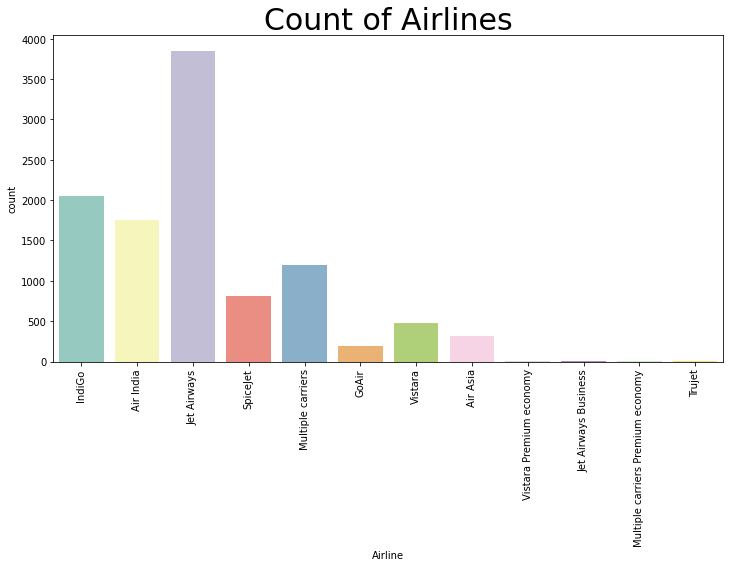

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data['Airline'], palette='Set3')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


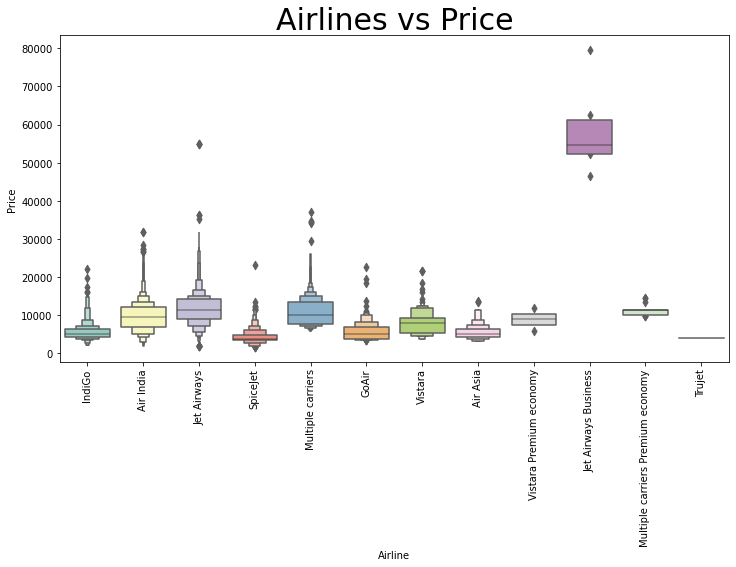

In [11]:
plt.figure(figsize=(12,6))
sns.boxenplot(data['Airline'], data['Price'], palette='Set3')
plt.title('Airlines vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


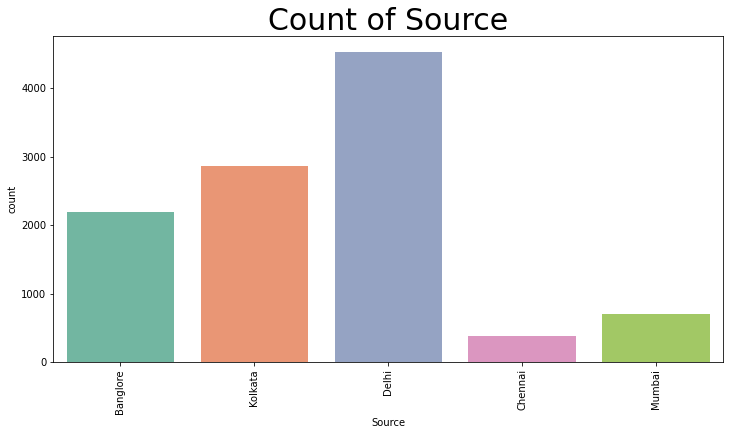

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(data['Source'], palette='Set2')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


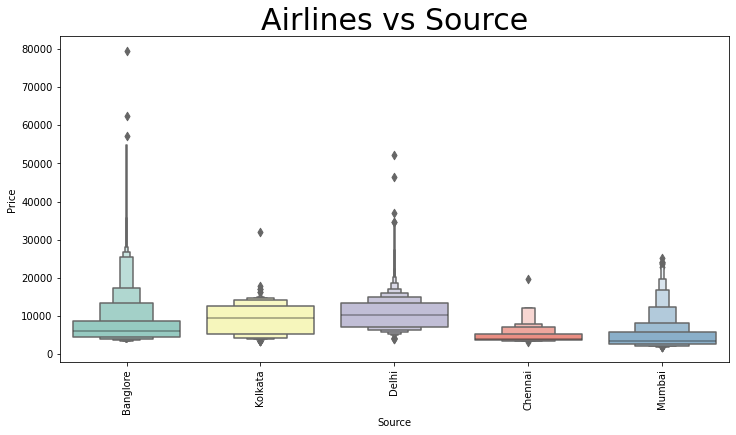

In [13]:
plt.figure(figsize=(12,6))
sns.boxenplot(data['Source'], data['Price'], palette='Set3')
plt.title('Airlines vs Source', size=30)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


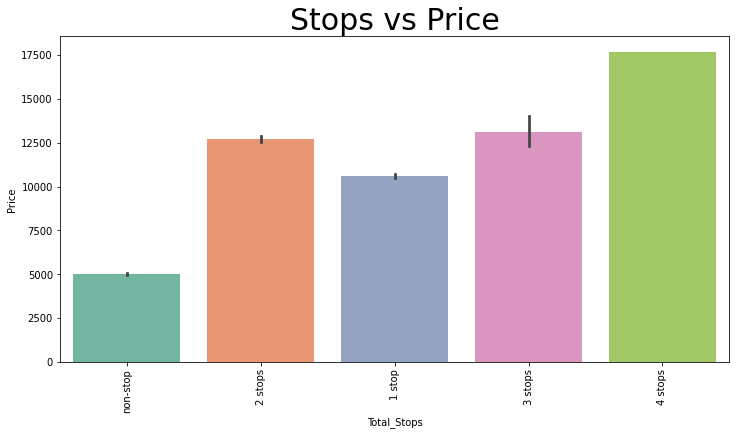

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(data['Total_Stops'], data['Price'], palette='Set2')
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


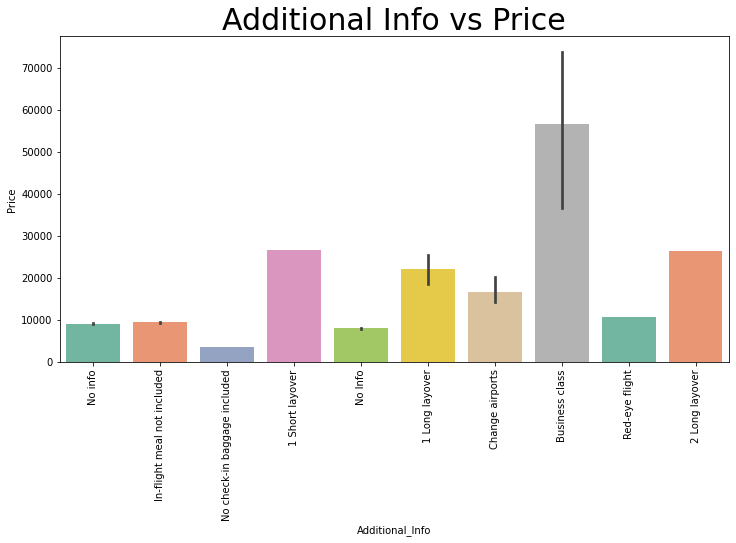

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(data['Additional_Info'], data['Price'], palette='Set2')
plt.title('Additional Info vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

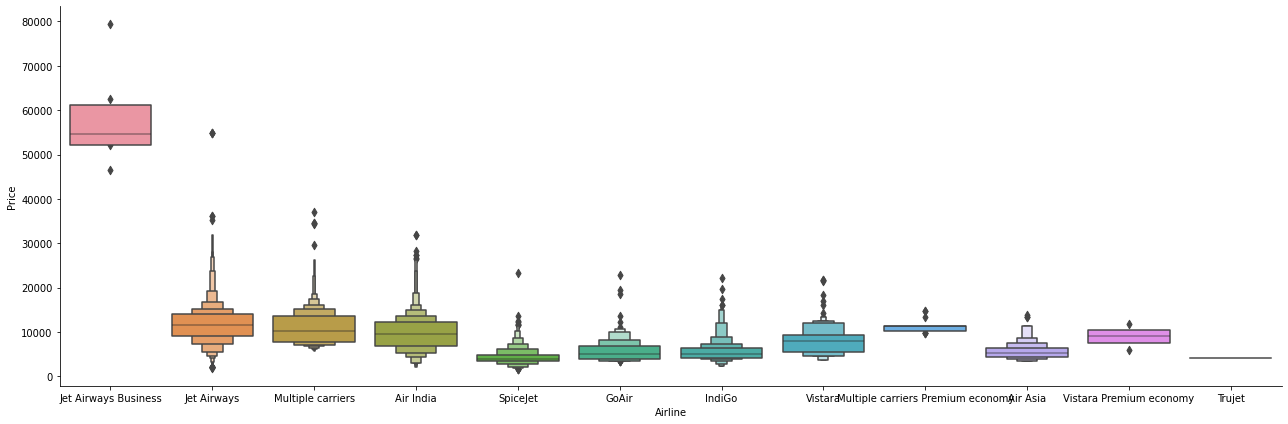

In [16]:
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

# EDA

### Cleaning Journey Date

In [17]:
#Training Set

train['Journey_Day'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.day
train['Journey_Month'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.month

# Test Set

test['Journey_Day'] = pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.day
test['Journey_Month'] = pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.month

# Compare the dates and delete the original date feature

train.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
test.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

### Cleaning Duration

In [18]:
# Training Set

duration = list(train['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
train['Duration_hours'] = dur_hours
train['Duration_minutes'] =dur_minutes

train.drop(labels = 'Duration', axis = 1, inplace = True)


# Test Set

durationT = list(test['Duration'])

for i in range(len(durationT)) :
    if len(durationT[i].split()) != 2:
        if 'h' in durationT[i] :
            durationT[i] = durationT[i].strip() + ' 0m'
        elif 'm' in durationT[i] :
            durationT[i] = '0h {}'.format(durationT[i].strip())
            
dur_hours = []
dur_minutes = []  

for i in range(len(durationT)) :
    dur_hours.append(int(durationT[i].split()[0][:-1]))
    dur_minutes.append(int(durationT[i].split()[1][:-1]))
  
    
test['Duration_hours'] = dur_hours
test['Duration_minutes'] = dur_minutes

test.drop(labels = 'Duration', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

### Cleaning Departure and Arrival Times

In [19]:
# Training Set


train['Depart_Time_Hour'] = pd.to_datetime(train.Dep_Time).dt.hour
train['Depart_Time_Minutes'] = pd.to_datetime(train.Dep_Time).dt.minute

train.drop(labels = 'Dep_Time', axis = 1, inplace = True)


train['Arr_Time_Hour'] = pd.to_datetime(train.Arrival_Time).dt.hour
train['Arr_Time_Minutes'] = pd.to_datetime(train.Arrival_Time).dt.minute

train.drop(labels = 'Arrival_Time', axis = 1, inplace = True)


# Test Set


test['Depart_Time_Hour'] = pd.to_datetime(test.Dep_Time).dt.hour
test['Depart_Time_Minutes'] = pd.to_datetime(test.Dep_Time).dt.minute


test.drop(labels = 'Dep_Time', axis = 1, inplace = True)

test['Arr_Time_Hour'] = pd.to_datetime(test.Arrival_Time).dt.hour
test['Arr_Time_Minutes'] = pd.to_datetime(test.Arrival_Time).dt.minute

test.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [20]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
4551,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,4804,6,5,2,35,4,40,7,15
7226,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,12557,21,3,24,35,18,15,18,50
6202,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,7005,15,6,15,0,6,0,21,0
4235,Multiple carriers,Delhi,Cochin,DEL → HYD → COK,1 stop,No info,6513,9,6,9,0,7,10,16,10
9664,Air Asia,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,7870,9,6,15,55,7,35,23,30


In [21]:
test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
7931,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,2753,15,3,1,25,22,45,0,10
5468,SpiceJet,Banglore,New Delhi,BLR → DEL,non-stop,No info,6309,15,3,2,55,9,35,12,30
8618,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,1 stop,No info,13731,9,6,12,10,16,30,4,40
3836,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,13555,18,3,10,10,22,50,9,0
7771,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,1 stop,In-flight meal not included,10844,21,5,21,5,21,10,18,15


In [22]:
for i in train.columns:
    print("Unique values in", i, train[i].nunique())

Unique values in Airline 12
Unique values in Source 5
Unique values in Destination 6
Unique values in Route 119
Unique values in Total_Stops 4
Unique values in Additional_Info 9
Unique values in Price 1588
Unique values in Journey_Day 10
Unique values in Journey_Month 4
Unique values in Duration_hours 43
Unique values in Duration_minutes 12
Unique values in Depart_Time_Hour 24
Unique values in Depart_Time_Minutes 12
Unique values in Arr_Time_Hour 24
Unique values in Arr_Time_Minutes 12


In [23]:
for i in test.columns:
    print("Unique values in", i, test[i].nunique())

Unique values in Airline 10
Unique values in Source 5
Unique values in Destination 6
Unique values in Route 99
Unique values in Total_Stops 5
Unique values in Additional_Info 8
Unique values in Price 1015
Unique values in Journey_Day 10
Unique values in Journey_Month 4
Unique values in Duration_hours 39
Unique values in Duration_minutes 12
Unique values in Depart_Time_Hour 24
Unique values in Depart_Time_Minutes 12
Unique values in Arr_Time_Hour 24
Unique values in Arr_Time_Minutes 12


In [24]:
y_train = train.iloc[:,6].values  
x_train = train.iloc[:,train.columns != 'Price'].values
x_test = test.iloc[:,test.columns != 'Price'].values
y_test = test.iloc[:,6].values 

### Handling categorical data

In [25]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()

# Training Set    

x_train[:,0] = le1.fit_transform(x_train[:,0])
x_train[:,1] = le1.fit_transform(x_train[:,1])
x_train[:,2] = le1.fit_transform(x_train[:,2])
x_train[:,3] = le1.fit_transform(x_train[:,3])
x_train[:,4] = le1.fit_transform(x_train[:,4])
x_train[:,5] = le1.fit_transform(x_train[:,5])

# Test Set


x_test[:,0] = le2.fit_transform(x_test[:,0])
x_test[:,1] = le2.fit_transform(x_test[:,1])
x_test[:,2] = le2.fit_transform(x_test[:,2])
x_test[:,3] = le2.fit_transform(x_test[:,3])
x_test[:,4] = le2.fit_transform(x_test[:,4])
x_test[:,5] = le2.fit_transform(x_test[:,5])

# Feature Scaling

### Training

In [26]:
print(pd.DataFrame(x_train).head()) # Xtrain after scaling

  0  1  2    3  4  5   6  7   8   9   10  11  12  13
0  3  3  0   57  3  7   6  5   2  35   4  40   7  15
1  4  2  1   95  0  7  21  3  24  35  18  15  18  50
2  6  2  1   95  0  7  15  6  15   0   6   0  21   0
3  6  2  1  102  0  7   9  6   9   0   7  10  16  10
4  0  3  0   66  0  7   9  6  15  55   7  35  23  30


### Testing

In [27]:
print(pd.DataFrame(x_test).head()) # Xtest after scaling

  0  1  2   3  4  5   6  7   8   9   10  11  12  13
0  8  4  3  32  4  7  15  3   1  25  22  45   0  10
1  8  0  5  12  4  7  15  3   2  55   9  35  12  30
2  4  3  0  45  0  7   9  6  12  10  16  30   4  40
3  4  0  5   3  0  7  18  3  10  10  22  50   9   0
4  4  3  0  45  0  4  21  5  21   5  21  10  18  15


In [28]:
print(pd.DataFrame(y_train).head())

       0
0   4804
1  12557
2   7005
3   6513
4   7870


In [29]:
x_test=pd.DataFrame(x_test)
x_train=pd.DataFrame(x_train)

# Feature Selection

In [30]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### Finds correlation between Independent and dependent attributes

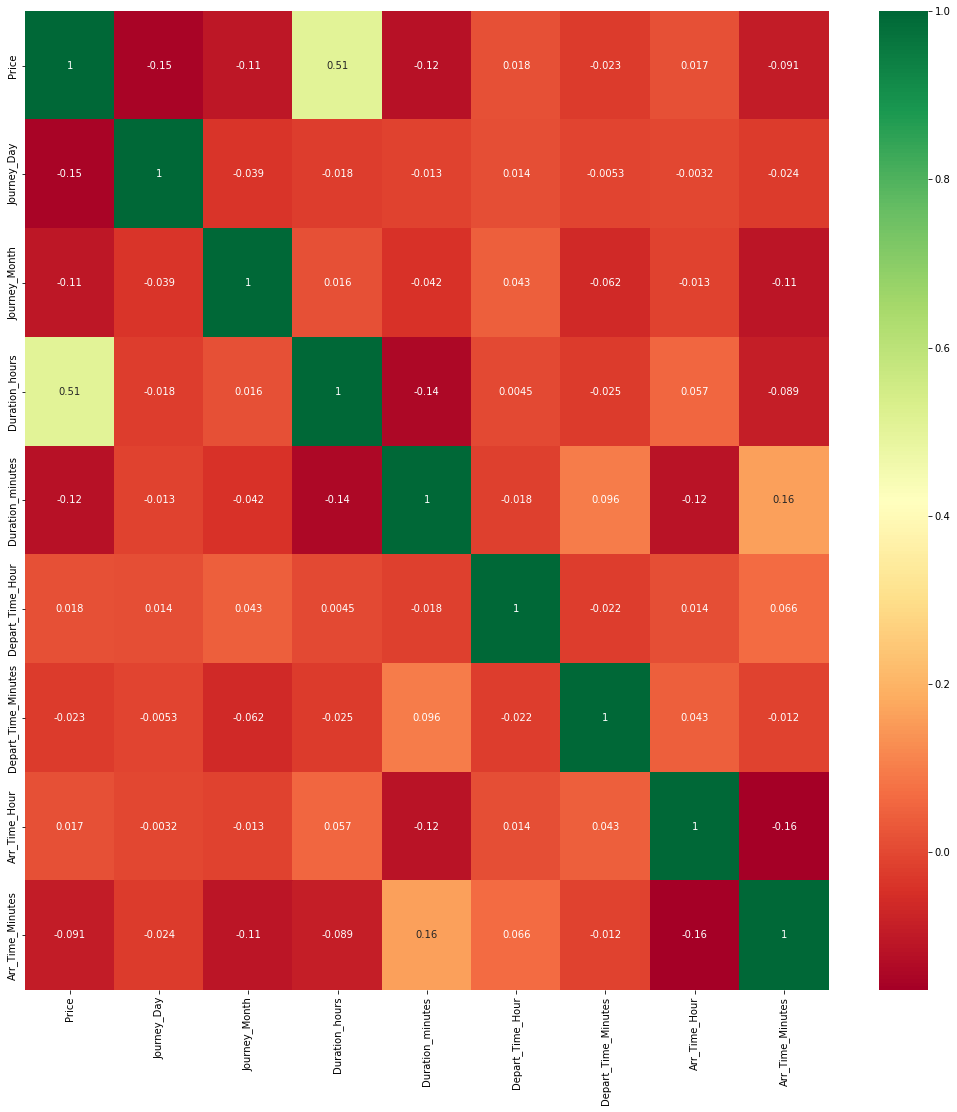

In [31]:
plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")
plt.show()

### Important feature using ExtraTreesRegressor

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x_train, y_train)

ExtraTreesRegressor()

In [33]:
selection.feature_importances_

array([0.13137193, 0.01143835, 0.02279463, 0.05707931, 0.36818975,
       0.05231642, 0.13810625, 0.04735014, 0.07208089, 0.0161016 ,
       0.02007587, 0.01950575, 0.02516393, 0.01842518])

### plot graph of feature importances for better visualization

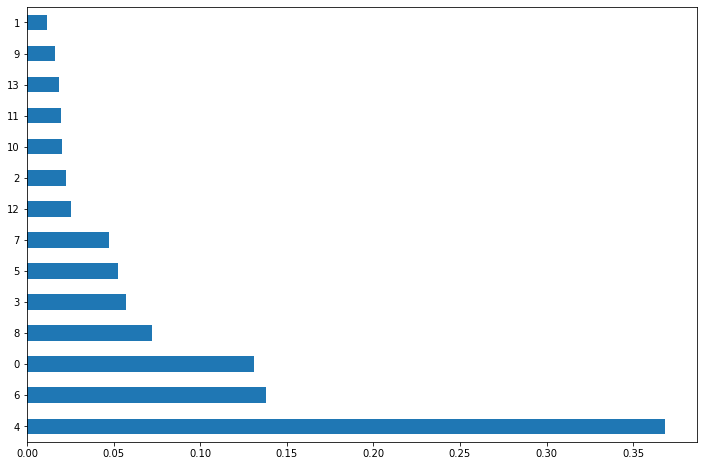

In [34]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model

### using Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)
y_pred=reg_rf.predict(x_test)

In [36]:
reg_rf.score(x_train, y_train)

0.9787480544486519

In [37]:
reg_rf.score(x_test, y_test)

0.836017492493411

In [38]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1101.2380441472897
MSE: 3466011.5910667884
RMSE: 1861.7227481735267


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


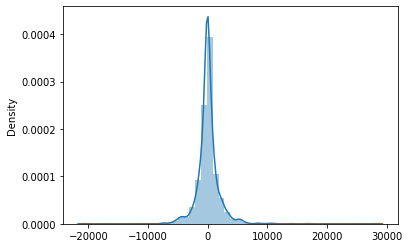

In [39]:
sns.distplot(y_test-y_pred)
plt.show()

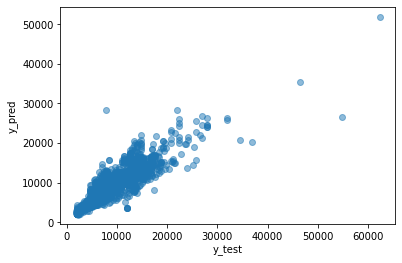

In [40]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### using XGBRegressor

In [41]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train.values, y_train)
y_pred2 = xgb.predict(x_test.values)

[15:52:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [42]:
xgb.score(x_train.values, y_train)

0.8381551303854631

In [43]:
xgb.score(x_test.values, y_test)

0.7715053259282376

In [44]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 1390.0451755755778
MSE: 4829571.158972147
RMSE: 2197.6285307058033


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


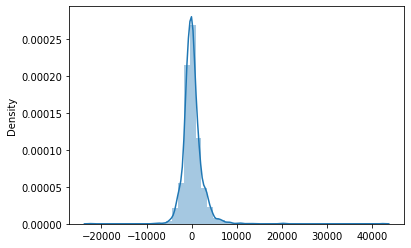

In [45]:
sns.distplot(y_test-y_pred2)
plt.show()

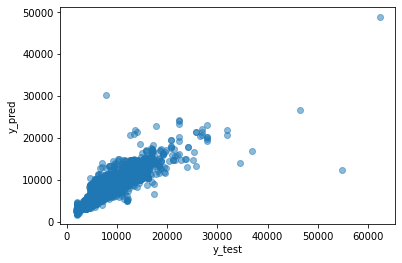

In [46]:
plt.scatter(y_test, y_pred2, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### using GradientBossting Regressor

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
y_pred4 = gb.predict(x_test)

In [48]:
gb.score(x_train,y_train)

0.8409418907610179

In [49]:
gb.score(x_test,y_test)

0.7676912616298505

In [50]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 1481.09035501532
MSE: 4910187.020189861
RMSE: 2215.894180729274


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


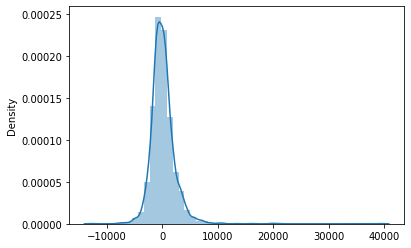

In [51]:
sns.distplot(y_test-y_pred4)
plt.show()

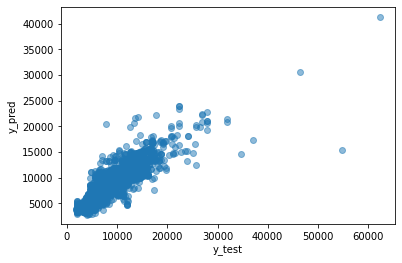

In [52]:
plt.scatter(y_test, y_pred4, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### Comparison

In [53]:
results_final=[['Random Forest',reg_rf.score(x_train, y_train),reg_rf.score(x_test, y_test)],['XGBRegressor',xgb.score(x_train.values, y_train),xgb.score(x_test.values, y_test)],['Gradient Boosting Regressor',gb.score(x_train,y_train),gb.score(x_test,y_test)]]
results_final = pd.DataFrame(results_final, columns = ['Model', 'Training r2 Score','Testing r2 Score'])
results_final

,Model,Training r2 Score,Testing r2 Score
0,Random Forest,0.978748,0.836017
1,XGBRegressor,0.838155,0.771505
2,Gradient Boosting Regressor,0.840942,0.767691


# Cross Validation

### Random Forest

In [54]:
random_forest=[]
for i in range(2,9):
  cv=cross_val_score(reg_rf,x_train,y_train,cv=i)
  random_forest.append(cv.mean())
  print("At fold ", i , "mean cv score is", cv.mean())

At fold  2 mean cv score is 0.8297505632373245
At fold  3 mean cv score is 0.8486041100560185
At fold  4 mean cv score is 0.8519452711450011
At fold  5 mean cv score is 0.8581424913616982
At fold  6 mean cv score is 0.8574968425436453
At fold  7 mean cv score is 0.8596889510550951
At fold  8 mean cv score is 0.8607614491233044


### XGBoostRegressor

In [ ]:
xgboostregressor=[]
for i in range(2,9):
  cv=cross_val_score(xgb,x_train.values,y_train,cv=i)
  xgboostregressor.append(cv.mean())
xgboostregressor

### GradientBossting Regressor

In [56]:
GBR=[]
for i in range(2,9):
  cv_n=cross_val_score(gb,x_train,y_train,cv=i)
  GBR.append(cv_n.mean())
  print("At fold ", i , "mean cv score is", cv_n.mean())

At fold  2 mean cv score is 0.7770386346073822
At fold  3 mean cv score is 0.8117196863127377
At fold  4 mean cv score is 0.8137567425535933
At fold  5 mean cv score is 0.8159471222740082
At fold  6 mean cv score is 0.8123796232171886
At fold  7 mean cv score is 0.8148018950723482
At fold  8 mean cv score is 0.8174366537447569


### Comparison of all three models

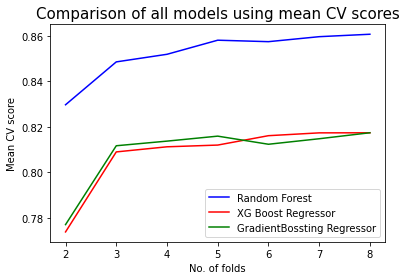

In [57]:
import matplotlib.pyplot as plt
x=[i for i in range(2,9)]
plt.plot(x,random_forest,color = 'Blue',label='Random Forest')
plt.plot(x,xgboostregressor,color = 'Red',label='XG Boost Regressor')
plt.plot(x,GBR,color = 'Green',label='GradientBossting Regressor')
plt.ylabel("Mean CV score")
plt.xlabel("No. of folds")
plt.title('Comparison of all models using mean CV scores', size=15)
plt.legend()
plt.show()

# Hyperparameter Tuning

#### Random Forest

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[20,30,50,70,100],'max_depth':[None,1,2,3],'max_samples':[50,200,300,500,1000],'min_samples_split':[2,4,6,10]}

In [59]:
gcv_rfr=GridSearchCV(reg_rf,param_grid,cv=5)
res=gcv_rfr.fit(x_train,y_train)  
res.best_params_

{'max_depth': None,
 'max_samples': 1000,
 'min_samples_split': 2,
 'n_estimators': 50}

In [60]:
reg_rf = RandomForestRegressor(max_depth=None,max_samples=1000,min_samples_split=2,n_estimators=100)
reg_rf.fit(x_train, y_train)
y_pred=reg_rf.predict(x_test)

In [61]:
reg_rf.score(x_test, y_test)

0.804951380138447

### XGBRegressor

In [ ]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
clf = GridSearchCV(xgb,param_grid,cv=5)
clf.fit(x_train.values, y_train)

In [63]:
clf.best_params_

{'max_depth': 3,
 'max_samples': 50,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
xgb = XGBRegressor(max_depth=3,max_samples=50,min_samples_split=2,n_estimators=100)
xgb.fit(x_train.values, y_train)
y_pred2 = xgb.predict(x_test.values)

In [65]:
xgb.score(x_test.values, y_test)

0.7715053259282376

### GradientBoosting Regressor

In [69]:
param_grid2={'alpha':[0.9,0.09,0.1],'learning_rate':[0.1,0.01],'max_depth':[3,4,5],'min_samples_leaf':[1,2,3],'min_samples_split':[2,3,4],'n_estimators':[100,50,10]}
gcv_gd=GridSearchCV(gb,param_grid2,cv=3)
res2=gcv_gd.fit(x_train,y_train)  
res2.best_params_

{'alpha': 0.09,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [70]:
gb = GradientBoostingRegressor(alpha=0.09,learning_rate=0.1,max_depth=5,min_samples_leaf=2,min_samples_split=4,n_estimators=100)
gb.fit(x_train, y_train)
y_pred4 = gb.predict(x_test)
gb.score(x_test,y_test)

0.8254299507930931

# Conclusion

In [71]:
pd.DataFrame({'Actual': y_test,'Predicted': y_pred4})

,Actual,Predicted
0,2753,2951.364639
1,6309,5293.769095
2,13731,13631.054198
3,13555,13053.769783
4,10844,10141.714265
...,...,...
3200,8854,6885.226092
3201,8656,9757.732967
3202,3850,4665.763251
3203,9443,10910.095186


In [72]:
results_final=[['Random Forest',reg_rf.score(x_train, y_train),reg_rf.score(x_test, y_test)],['XGBRegressor',xgb.score(x_train.values, y_train),xgb.score(x_test.values, y_test)],['Gradient Boosting Regressor',gb.score(x_train,y_train),gb.score(x_test,y_test)]]
results_final = pd.DataFrame(results_final, columns = ['Model', 'Training r2 Score','Testing r2 Score'])
results_final

,Model,Training r2 Score,Testing r2 Score
0,Random Forest,0.861169,0.804951
1,XGBRegressor,0.838155,0.771505
2,Gradient Boosting Regressor,0.918393,0.825430
